##### HEART DISEASE PREDICTION



**Details about Features**

1. **Age:** age of the patient [years]
2. **Sex:** sex of the patient [M: Male, F: Female]
3. **ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. **RestingBP:** resting blood pressure [mm Hg]
5. **Cholesterol:** serum cholesterol [mm/dl]
6. **FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. **RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. **MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]
9. **ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]
10. **Oldpeak:** oldpeak = ST [Numeric value measured in depression]
11. **ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. **HeartDisease:** output class [1: heart disease, 0: Normal]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
# shape of the data set
df.shape

(918, 12)

In [4]:
# column name 
list(df.columns)

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [5]:
# Information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


From the observation, we have no null values

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
# to verify 
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We have 0 null values

# EXPLORATORY DATA ANALYSIS

In [8]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

The average age of patients admitted is 53 years, the maximum age is 77.

Text(0.5, 1.0, 'Distribution of Age')

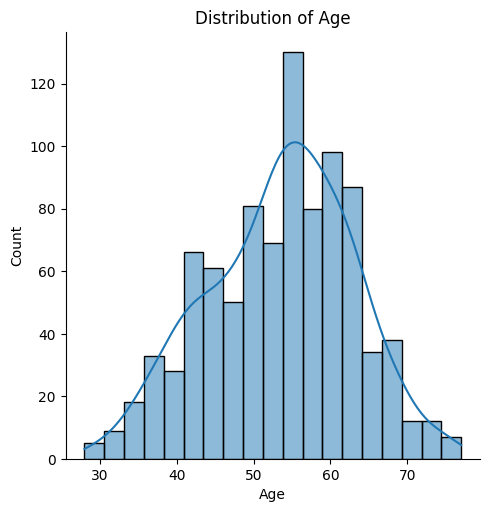

In [9]:
sns.displot(df['Age'], kde=True)
plt.title('Distribution of Age')

In [10]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

There are 725 males and 193 female patients. More males than females suffer from heart attack.

We can also conclude that there is a  significant difference between that number of male and female patients which suggests that the distribution is skewed toward males. 

Text(0, 0.5, '')

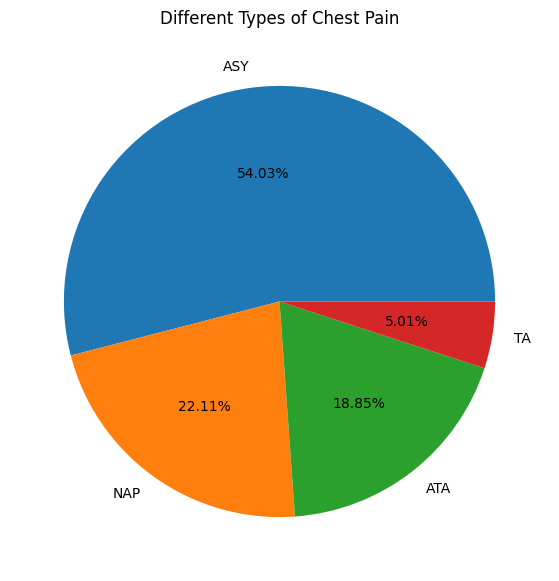

In [11]:
# chest pain type 
chest_pain_typs = df['ChestPainType'].value_counts()
# plot bar to visualize the different types of chest pains 
plt.figure(figsize=(10, 7)) 
chest_pain_typs.plot(kind='pie', autopct='%.2f%%')
plt.title('Different Types of Chest Pain')
plt.ylabel('')

<Axes: ylabel='Cholesterol'>

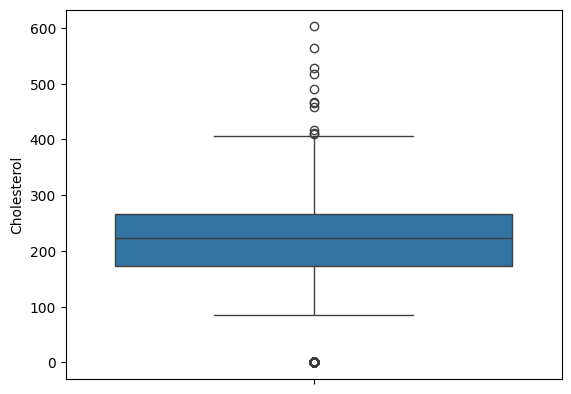

In [12]:
sns.boxplot(df['Cholesterol'])

Some values in distributions appears to be zero in this column which is an unrealistic score in medical reports. I will replace the zeros with the median of the column.

In [13]:
# fill 0 values with the median of column
median_value = df['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].replace(0, median_value)

Text(0.5, 1.0, 'Distribution of Cholesterol Level')

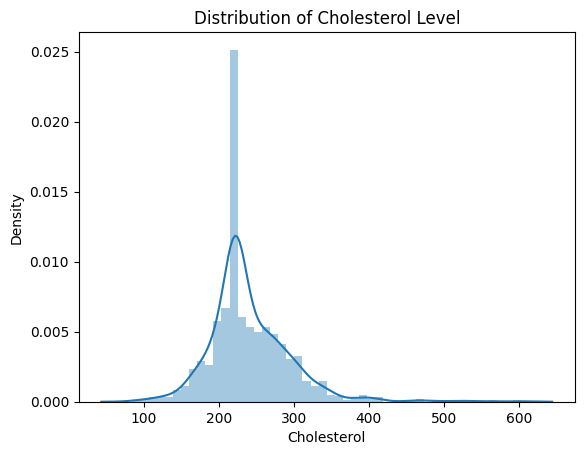

In [14]:
# new distrbution
sns.distplot(df['Cholesterol'])
plt.title('Distribution of Cholesterol Level')

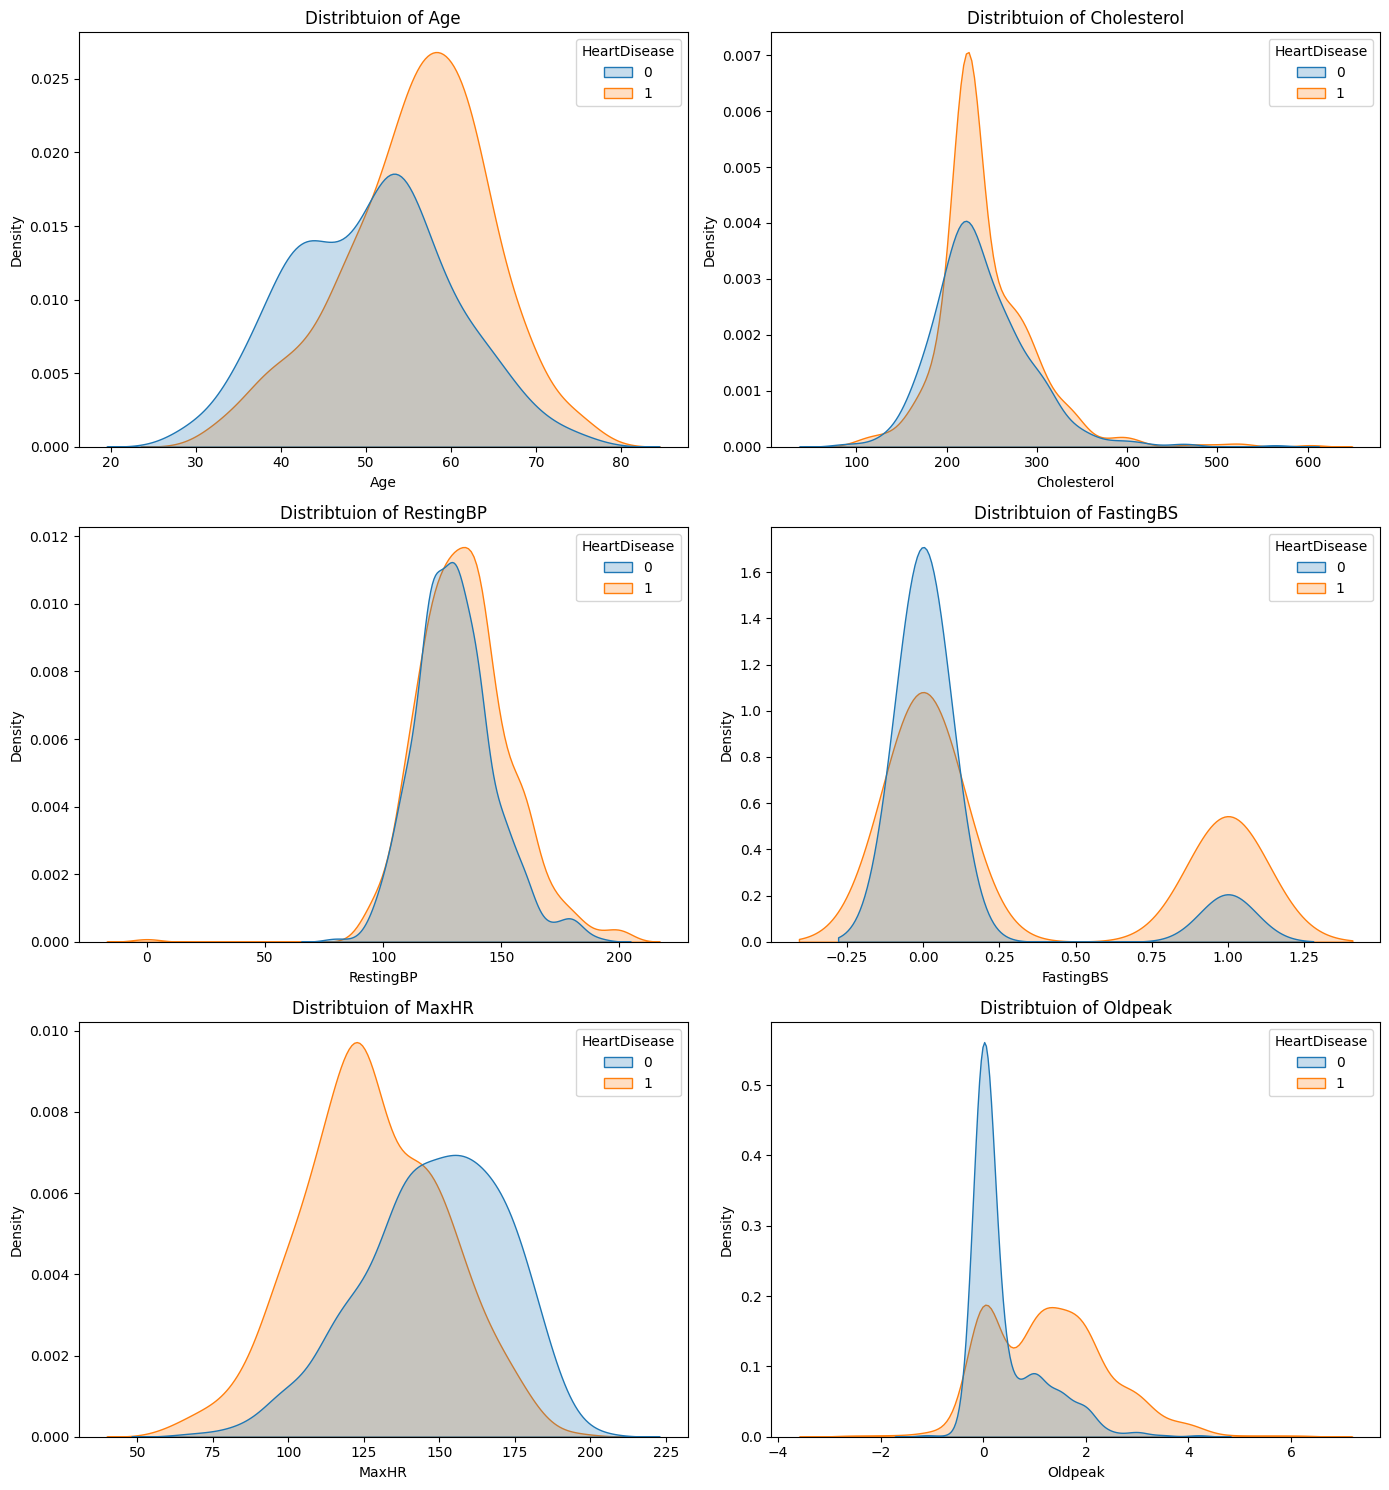

In [15]:
# numerical features
numerical_features = ['Age', 'Cholesterol', 'RestingBP', 'FastingBS',
                      'MaxHR', 'Oldpeak']
width = len(numerical_features) 
ncols = 2
nrows = int(np.ceil(width/ncols)) 

fig, axes = plt.subplots(nrows, ncols, figsize=(14, 15))

axes = axes.flatten()

# Plot KDE for each feature
for i, feature in enumerate(numerical_features):
    sns.kdeplot(data=df, x=feature, hue='HeartDisease', ax=axes[i], fill=True)
    axes[i].set_title(f'Distribtuion of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
restingecg = df['RestingECG'].value_counts()
restingecg

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

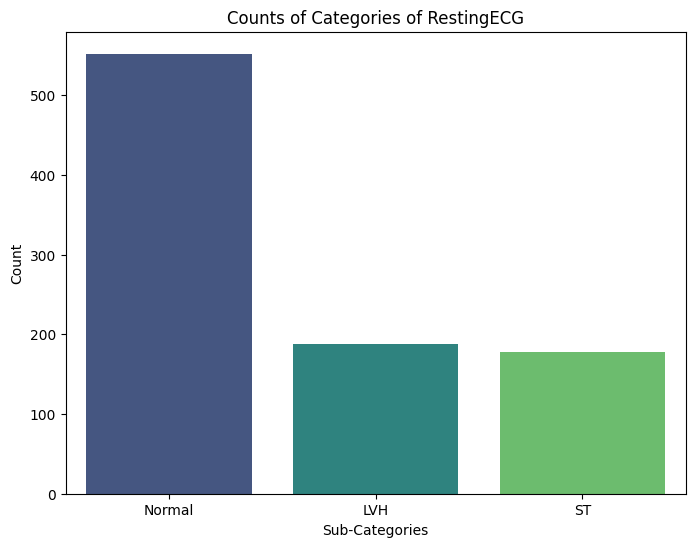

In [17]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=restingecg.index, y=restingecg, palette='viridis')
plt.title('Counts of Categories of RestingECG')
plt.xlabel('Sub-Categories')
plt.ylabel('Count')
plt.show()

<Figure size 1400x1600 with 0 Axes>

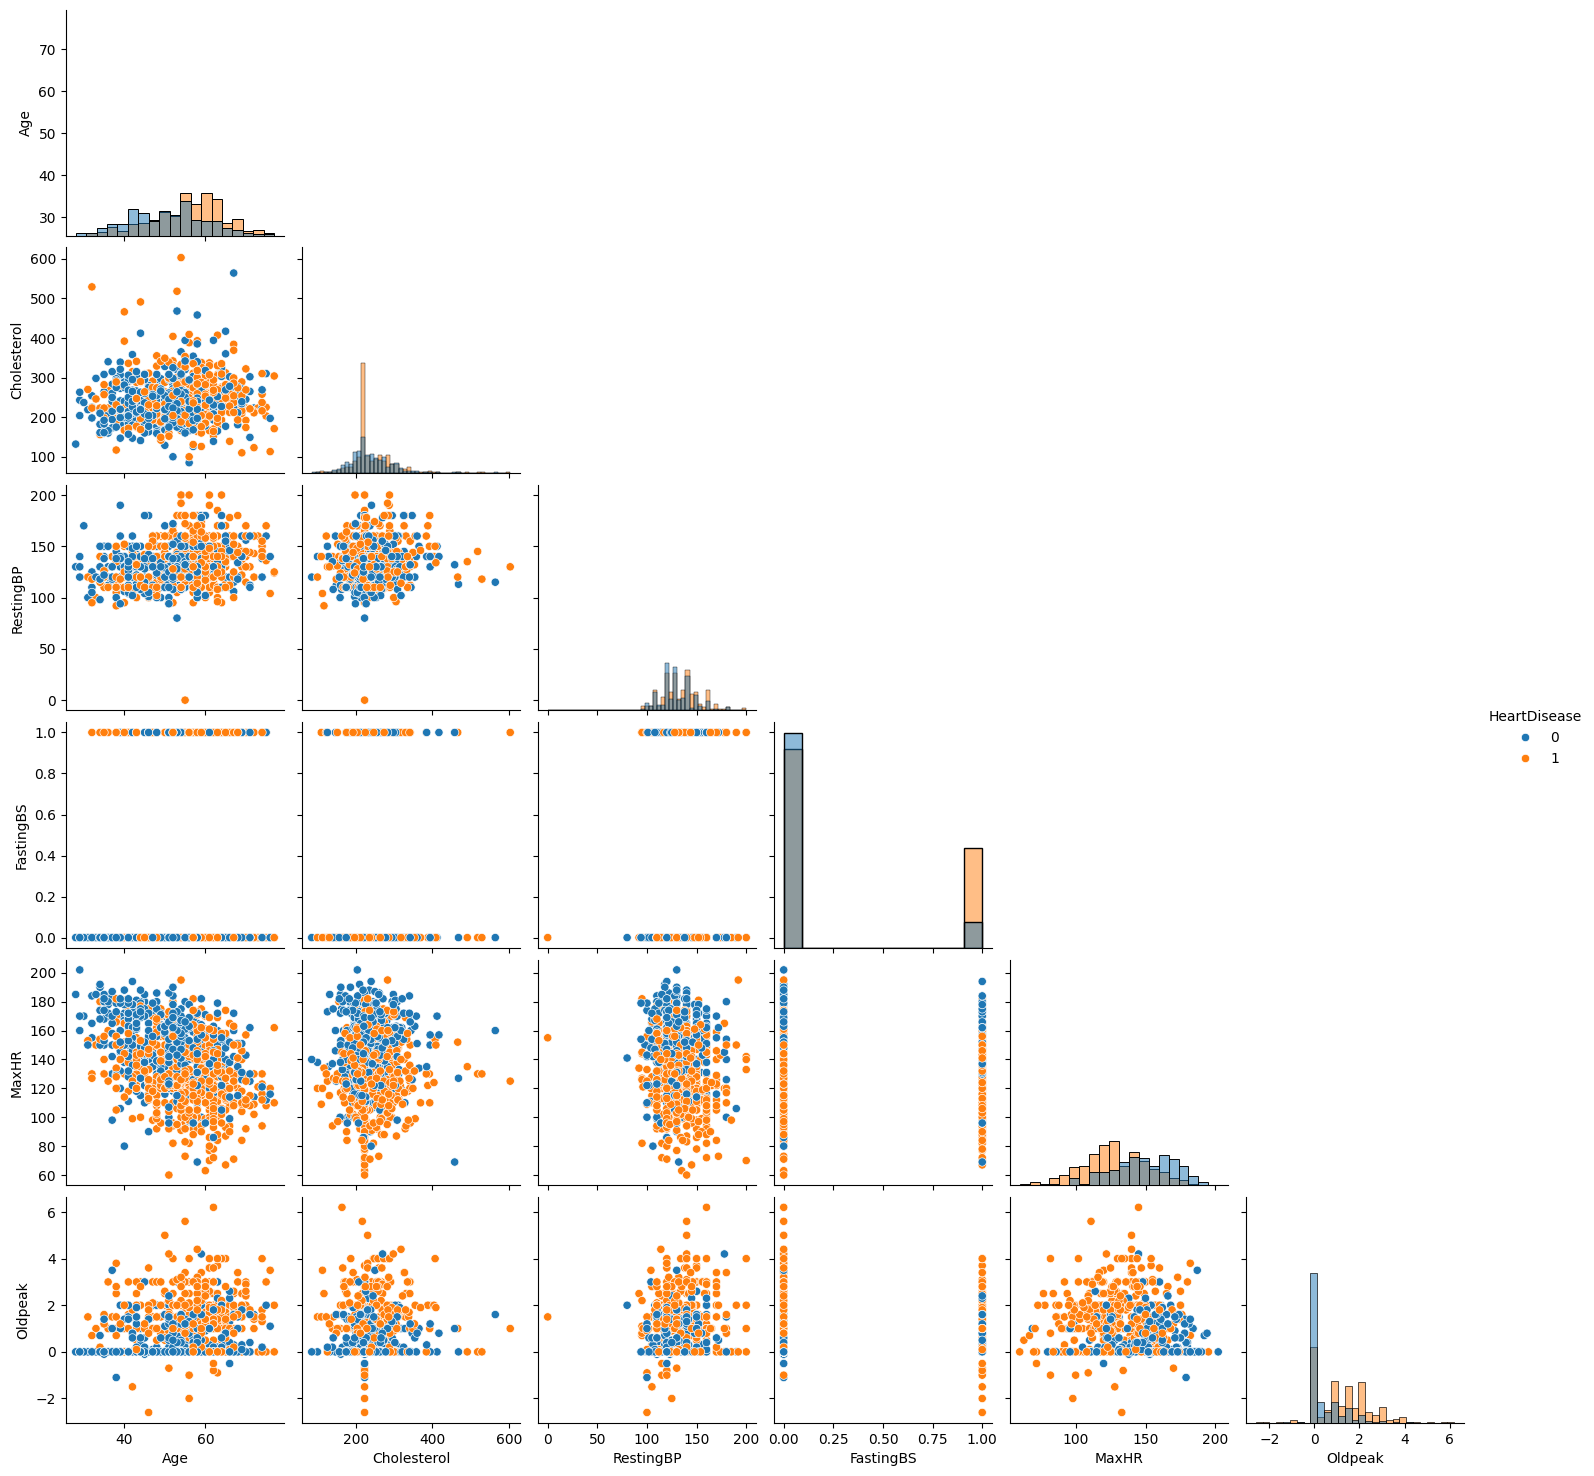

In [18]:
# pairplot of numerical features
num_feat = ['Age', 'Cholesterol', 'RestingBP', 'FastingBS',
                      'MaxHR', 'Oldpeak', 'HeartDisease']
data = df[num_feat]
plt.figure(figsize=(14,16))
g = sns.pairplot(data, hue='HeartDisease', diag_kind='hist')

# Get the axes from the pairplot
axes = g.axes

# Number of features
n = len(data.columns) - 1  

# To hide the upper triangle
for i in range(n):
    for j in range(i+1, n):
        axes[i, j].set_visible(False)

plt.show()

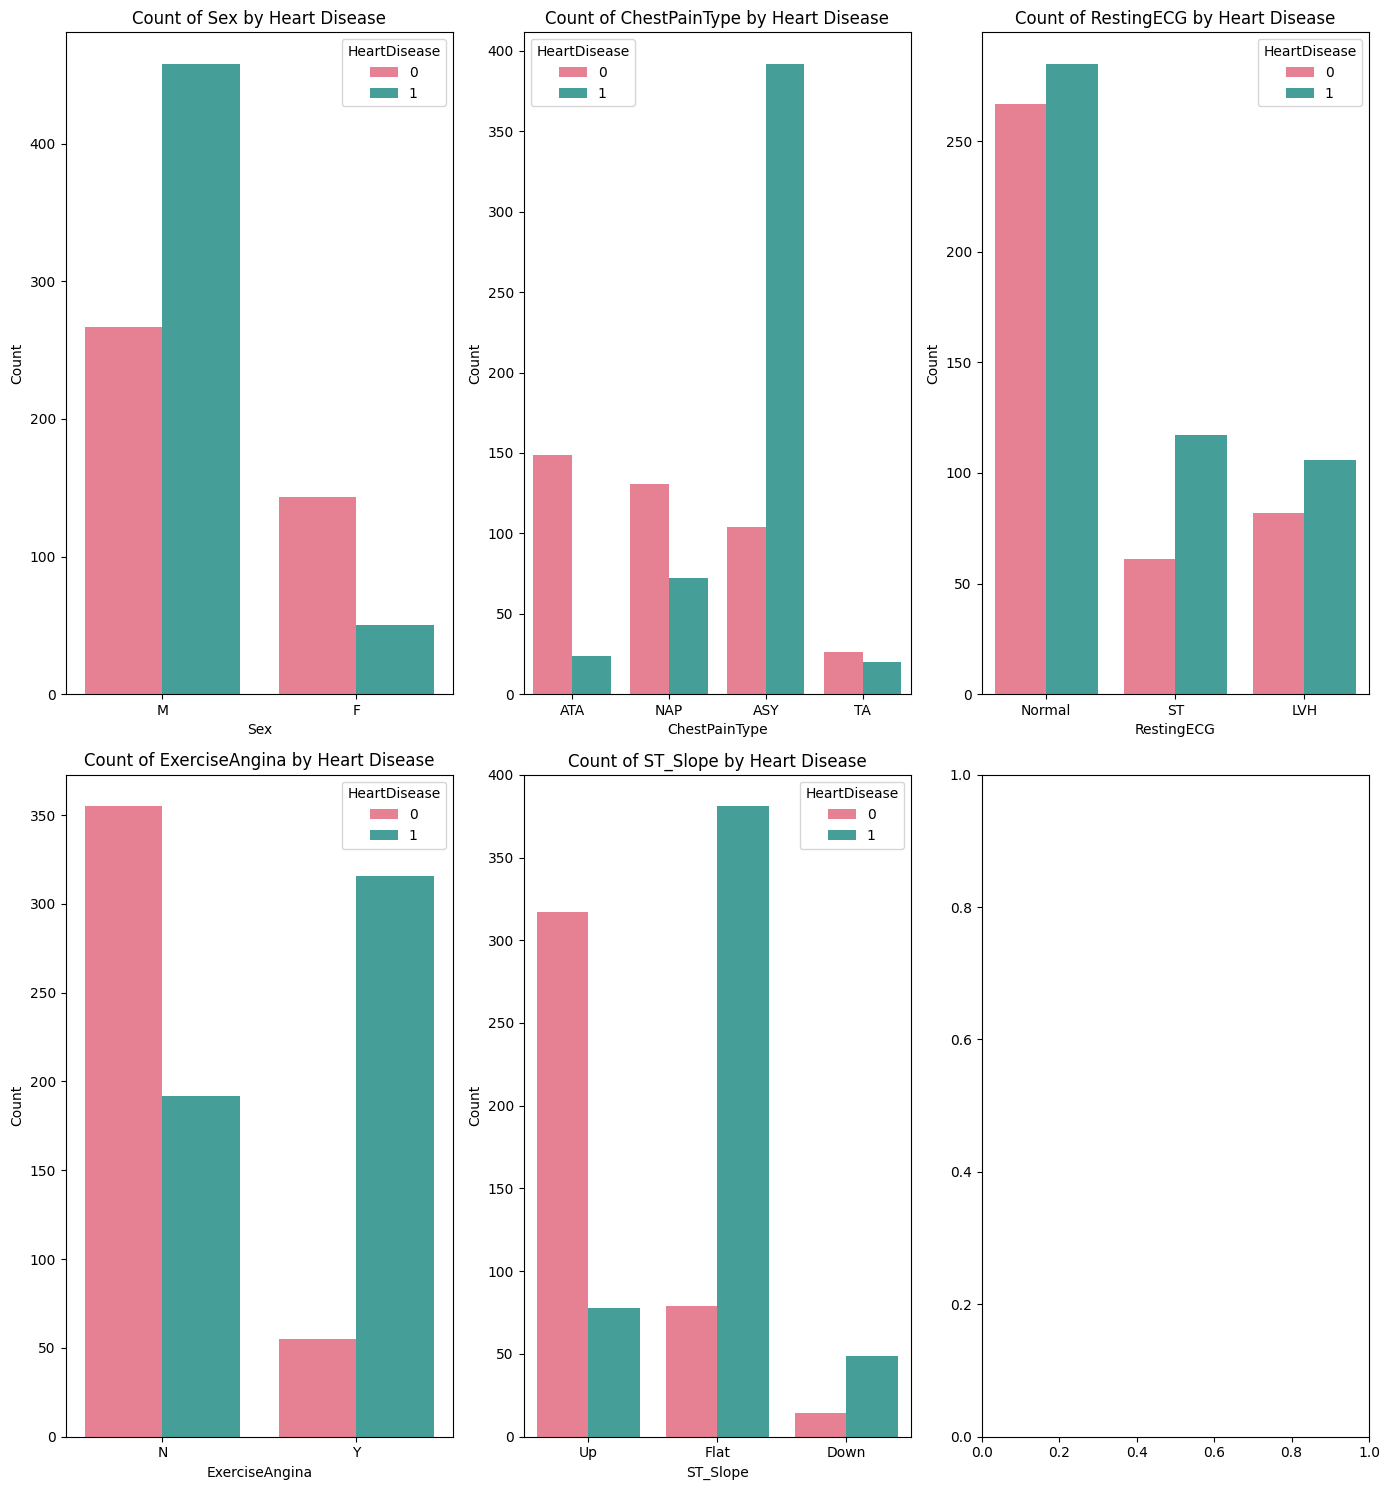

In [19]:
# categorical features
cat_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 
                'ST_Slope']

fig, axes = plt.subplots(nrows = 2, ncols= int(np.ceil(len(cat_features) / 2)),
                       figsize=(14, 15))

axes = axes.flatten()

# Plot each categorical feature with hue
for i, feature in enumerate(cat_features):
    sns.countplot(data=df, x=feature, hue='HeartDisease', ax=axes[i], palette='husl')
    axes[i].set_title(f'Count of {feature} by Heart Disease')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# FINDINGS
1. **Sex**: More than 70% of patients admitted with heart disease were male.
2. **Chest Pain Type**: Most patients diagnosed with heart disease reported asymptomatic chest pain, which is a major indicator of heart disease. Fewer patients with typical angina ended up with heart disease.
3. **RestingECG**: Among patients with normal resting ECG, up to 300 had heart disease. There were more cases of heart disease in patients with ST deviations and left ventricular hypertrophy (LVH).
4. **Exercise Angina**: Two-thirds of patients did not show exercise-induced angina, whereas 96% of patients who reported exercise-induced angina had heart disease.
5. **ST-Slope**: Most patients with heart disease had a flat ST slope. 

Text(0.5, 1.0, 'Correlation Heatmap')

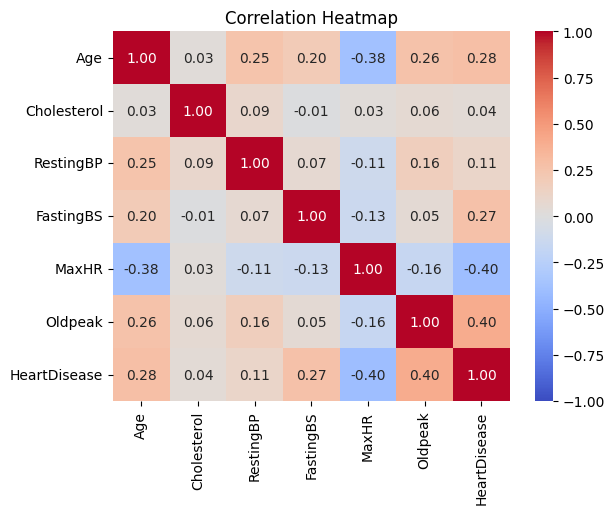

In [20]:
# Correlation 
correlation = df[num_feat].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

**SUMMARY**

Maximum Heart Rate (MaxHR) is inversely related to heart disease, with a correlation coefficient of -0.40, followed by Age, which has a correlation of -0.38. The age of a patient does not directly influence their maximum heart rate, as other factors such as exercise and stress could contribute to this relationship. Additionally, Age is positively correlated with heart disease; a correlation value of 0.28 indicates that the probability of a patient developing heart disease increases by 28% as they get older. Oldpeak is also associated with heart disease.


# Modelling 

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [22]:
# transform stegorical features 
cat_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 
                'ST_Slope']

label_encoder = LabelEncoder()
for col in cat_features:
   # Encode each categorical column individually
    df[col] = label_encoder.fit_transform(df[col])

In [23]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [24]:
# a function to train and evaluate my data on different classifers

def train_and_evaluate_classifiers(X, y):
    """
    Train and evaluate four different binary classification models.
    
    Parameters:
    X (pd.DataFrame or np.ndarray): Features dataset.
    y (pd.Series or np.ndarray): Target variable (binary).

    Returns:
    pd.DataFrame: A DataFrame containing the accuracy, recall, and precision for each model.
    """
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # scale features in train set
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define the models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(),
        'Gradient Boosting': GradientBoostingClassifier()
    }
    
    # Initialize results storage
    results = []
    
    # Train and evaluate each model
    for name, model in models.items():
        # Train the model
        model.fit(X_train_scaled, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test_scaled)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f_one_score = f1_score(y_test, y_pred)
        
        # Store results
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Recall': recall,
            'Precision': precision,
            'F1 Score': f_one_score
        })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df


In [25]:
# split data into features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [26]:
results = train_and_evaluate_classifiers(X, y)
print(results)

                    Model  Accuracy    Recall  Precision  F1 Score
0     Logistic Regression  0.862319  0.841463   0.920000  0.878981
1           Decision Tree  0.750000  0.707317   0.846715  0.770764
2           Random Forest  0.880435  0.884146   0.911950  0.897833
3  Support Vector Machine  0.873188  0.865854   0.916129  0.890282
4       Gradient Boosting  0.836957  0.810976   0.904762  0.855305


Although the default parameters were used, the results were quite promising. Among the models tested, the Support Vector Machine achieved the highest accuracy at 87%. In healthcare analytics, it’s important to consider metrics beyond accuracy to evaluate model performance comprehensively. Recall is crucial when the goal is to identify as many positive cases as possible; it measures how frequently the model identifies positive instances out of all actual positive samples. Precision estimates the percentage of predicted positive cases that are truly positive. The logistic regression model achieved a precision of 92%, meaning that when the model predicts a positive case, it is correct 92% of the time. This aligns well with our goal of accurately identifying positive cases of heart disease.

Text(50.722222222222214, 0.5, 'Predicted Labels')

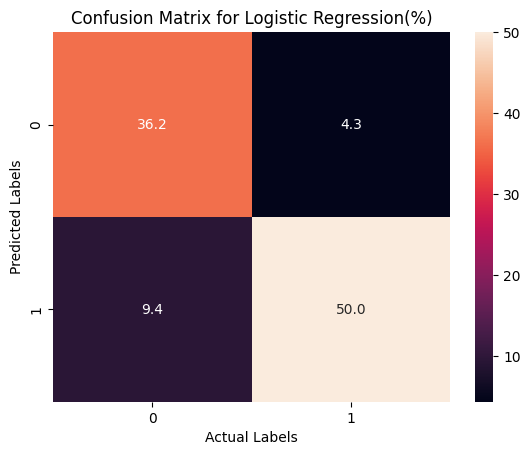

In [28]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
# scale features in train set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
total_cm = cm.sum()
# percentage os values
percentage_cm = (cm / total_cm) * 100
sns.heatmap(percentage_cm, annot=True, fmt='.1f')
plt.title('Confusion Matrix for Logistic Regression(%)')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

**SUMMARY**
1. **True Negative (TN):** The number of patients correctly classified as not having heart disease. 36% of the patients who actually have heart disease were incorrectly classified as not having it.
2. **False Negative (FN):** The number of patients incorrectly classified as not having heart disease. 4.3% of patients fell into this category.
3. **False Positive (FP):** The number of patients without heart disease who were incorrectly classified as having it. 9.4% of the patients admitted were misclassified as having heart disease.
4. **True Positive (TP):** The number of patients correctly identified with heart disease. 50% of patients admitted with heart disease were correctly identified as having the disease.